## **ECOM90025 ADA Tutorial 8** ##

In [ ]:
# library package
import pandas as pd
import numpy as np
from scipy.stats import dirichlet, gamma, uniform, norm
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
import patsy
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import requests
from PIL import Image
from io import BytesIO

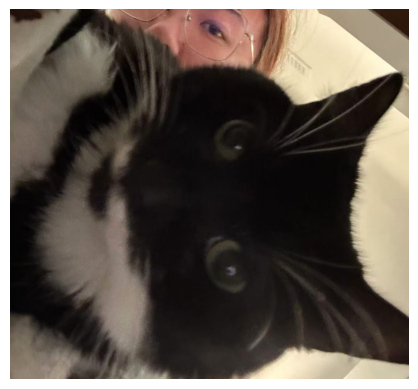

In [ ]:
# cat picture: cat selfie
# https://drive.google.com/file/d/1m03Z_AIbxt92adaT7ThDMiLlbK_Z1l3B/view?usp=drive_link
url = 'https://drive.google.com/uc?id=1m03Z_AIbxt92adaT7ThDMiLlbK_Z1l3B'

# Download and open the image
response = requests.get(url)
image = Image.open(BytesIO(response.content))

# my state this week with 2 mid exams
# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

###**Iris Flower Data**

Iris flower data set is a very famous python learning dat set. The data contains 150 rows corresponding to 150 Irish flower samples with three different types: ris setosa, I. versicolor, I. virginica. Each sample has informations of four specific features: sepal length, sepal width, petal length,petal width. The common task is to train models using the flower features to correctly classify them into types.

In [ ]:
# load the data set Iris
# the data set is shipped inside the package sklearn
# but it is not stored as a data frame, but rather a dictionary liked object
iris = datasets.load_iris()
type(iris)

sklearn.utils._bunch.Bunch

In [ ]:
# let's check what component does this dictionary include
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
# pull out feature names to construct data frame
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
# construct data frame
# include all the features first
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

# append the type indicator
df_iris['target'] = iris.target

# chnge the type indicator to be type name
df_iris['target'] = df_iris['target'].replace({0:iris.target_names[0], 1:iris.target_names[1], 2:iris.target_names[2]})
df_iris


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


###**K mean classifiction**

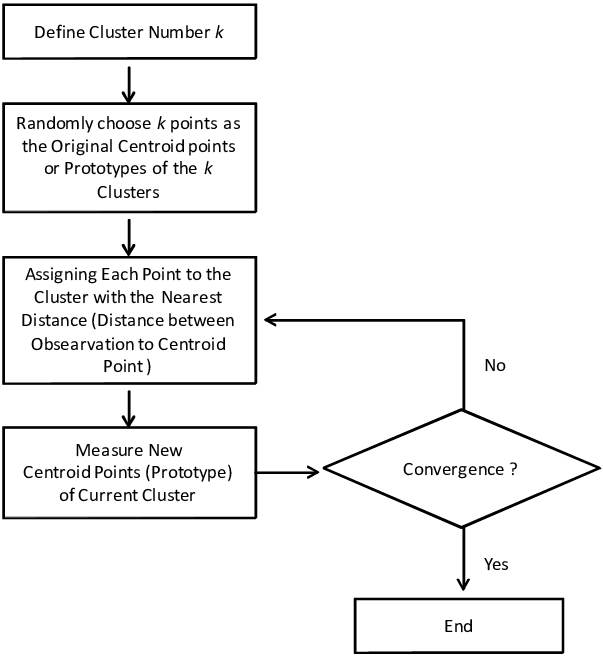

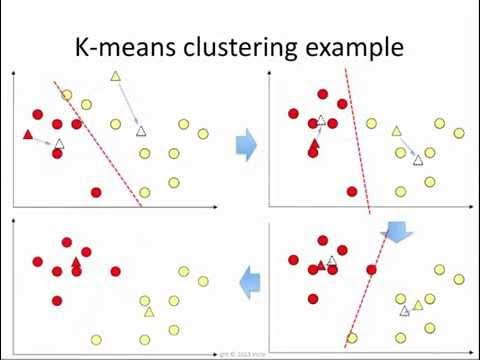

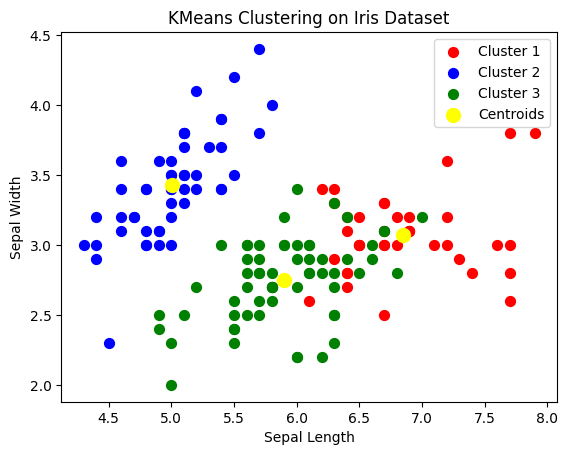

In [ ]:
# KMeans clustering
data = df_iris.iloc[:, 0:4]
kmeans = KMeans(n_clusters=3, n_init=10) # We know there are 3 types of iris species
kmeans.fit(data)
y_kmeans = kmeans.predict(data)

# Plotting the clusters using the first two features (sepal length and sepal width)
# Students should be able to produce plots at other dimensions.
plt.scatter(data.iloc[y_kmeans == 0, 0], data.iloc[y_kmeans == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(data.iloc[y_kmeans == 1, 0], data.iloc[y_kmeans == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(data.iloc[y_kmeans == 2, 0], data.iloc[y_kmeans == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.title('KMeans Clustering on Iris Dataset')
plt.show()

In [ ]:
# append the prediction back to the original data set to assess on the quality of prediction
df_iris['prediction'] = y_kmeans

# construct the cross table
print(pd.crosstab(df_iris['prediction'], df_iris['target']))

# Note that we don not cover here how to identify which cluste number correspond to which type here
# but it is clear that 0 here is virginica, 1 is setosa and 2 is vesicolor

target      setosa  versicolor  virginica
prediction                               
0                0           2         36
1               50           0          0
2                0          48         14


###**Logit regression**

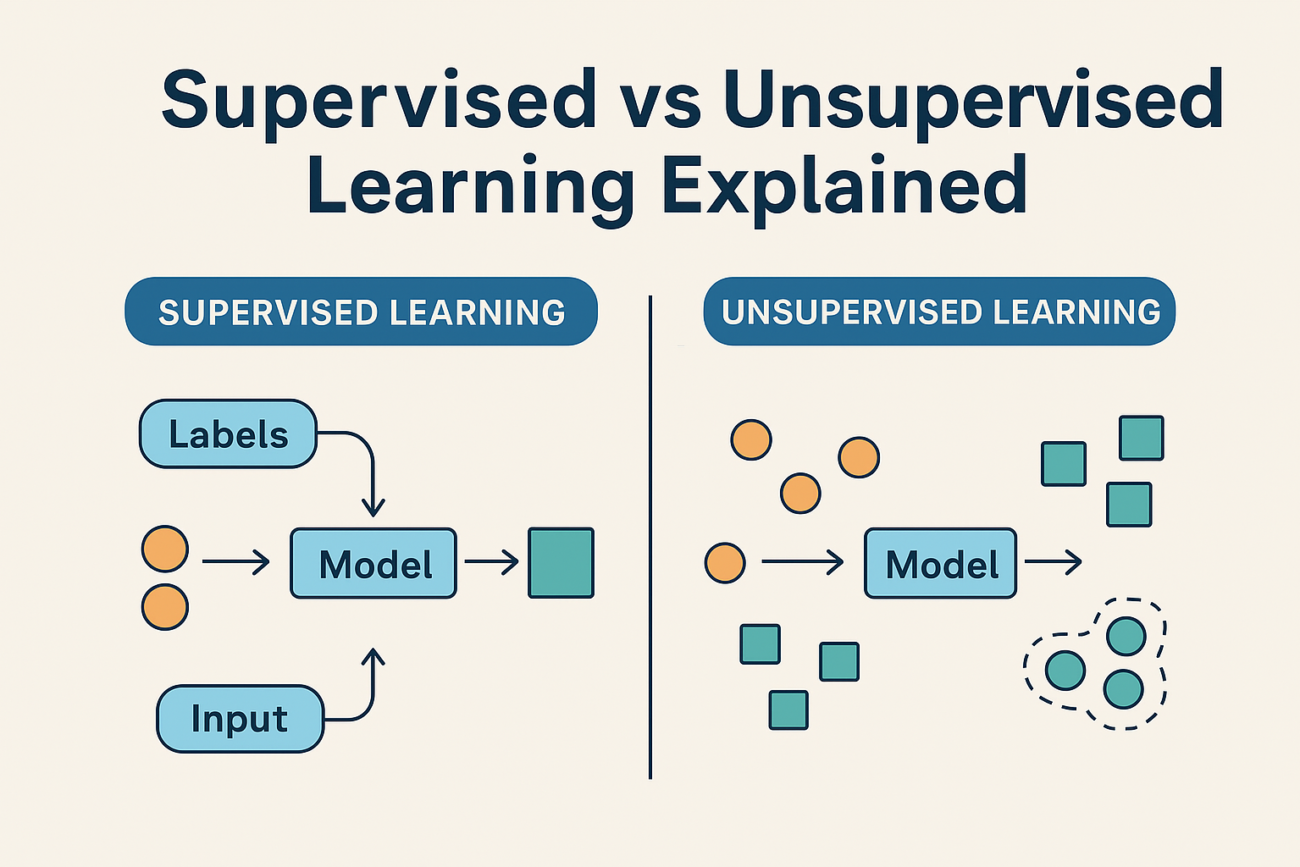

In [ ]:
# fit the logit model
logit_model = LogisticRegression(solver='saga',  max_iter=10000)
X = df_iris.iloc[:, 0:4]
y = df_iris['target']
logit_model.fit(X, y)

LogisticRegression(max_iter=10000, solver='saga')

In [ ]:
# compute prediction
y_hat = logit_model.predict(X)

# result matrix
print(pd.crosstab(y_hat, df_iris['target']))

target      setosa  versicolor  virginica
row_0                                    
setosa          50           0          0
versicolor       0          47          0
virginica        0           3         50


In [ ]:
# if we are concerned aboyt
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

X = df_iris.iloc[:, :4].values
y = df_iris['target'].values

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=5000, multi_class="multinomial", solver="lbfgs"))
])

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
pipe.fit(Xtr, ytr)
y_pred = pipe.predict(Xte)
print("Test accuracy:", accuracy_score(yte, y_pred))



cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipe, X, y, cv=cv)
print("CV accuracy (mean±sd):", scores.mean(), scores.std())


y_cvpred = cross_val_predict(pipe, X, y, cv=cv)
print(confusion_matrix(y, y_cvpred))



Test accuracy: 0.9111111111111111
CV accuracy (mean±sd): 0.9533333333333334 0.04521553322083511
[[50  0  0]
 [ 0 47  3]
 [ 0  4 46]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

###**PCA**

Set $\tilde{X}^1=X$, which is $n\times p$ (think design matrix). For $k=1,...,\min(n,p)$,

- Find
$$\varphi_k=\arg\max_{\varphi_k} \left[var(\tilde{X}^k \varphi_k)=var\{\nu_{k1},...\nu_{kn}\}\right], $$
where $\nu_{ki}=\varphi_k'x_i$ and $\sum\limits_{j=1}^p\varphi_{kj}^2=1$.
- Update rows of $\tilde{X}^k$ via
$$\tilde{x}^{k+1}_i = \tilde{x}^k_i-\nu_{ki}\varphi_k.$$

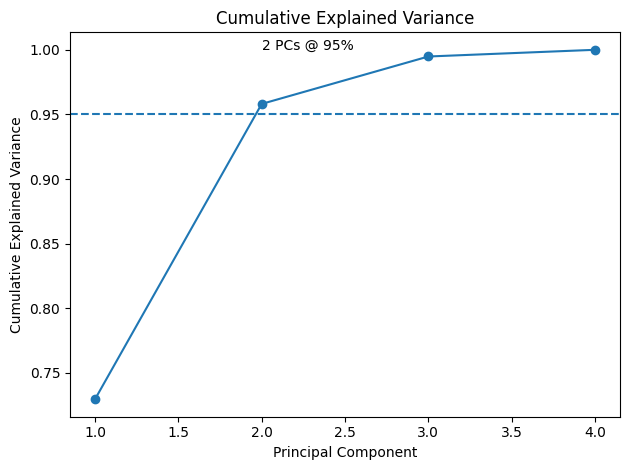

In [ ]:
# initiate scalar
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

# Now initialize the PCA object and calculate the principal components
pca      = PCA()
X_pca    = pca.fit_transform(X_scaled)

# calculate how many variation each pc explain and sketch a graph
evr = pca.explained_variance_ratio_           # per-PC share
cum_evr = np.cumsum(evr)                      # cumulative share

# cumulative explained variance plot
plt.figure()
plt.plot(np.arange(1, len(cum_evr)+1), cum_evr, marker='o')
plt.axhline(0.95, linestyle='--')  # 95% reference
# mark the smallest number of PCs reaching 95%
n95 = int(np.searchsorted(cum_evr, 0.95) + 1)
plt.annotate(f'{n95} PCs @ 95%',
             xy=(n95, cum_evr[n95-1]),
             xytext=(n95, min(1.0, cum_evr[n95-1]+0.05)))
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.tight_layout()
plt.show()

In [ ]:
# Add in the estimated principal components into the iris dataset
df_iris[['PC1', "PC2", 'PC3', 'PC4']]=X_pca

# Pull out just the principal components and do K-means on it
# (the process is the same as before, just that we're using the
# principal components rather than the actual data points themselves)
data     = df_iris[['PC1', "PC2", 'PC3', 'PC4']]
kmeans   = KMeans(n_clusters=3)
kmeans.fit(data)
y_kmeans = kmeans.predict(data)

# the performance of prediction
print(pd.crosstab(y_kmeans, df_iris['target']))

target  setosa  versicolor  virginica
row_0                                
0            1          37          8
1           49           0          0
2            0          13         42



PC1 versus PC2 (Principal Components): K-Means Clustering Illustration
---------------------------------------------------------------------


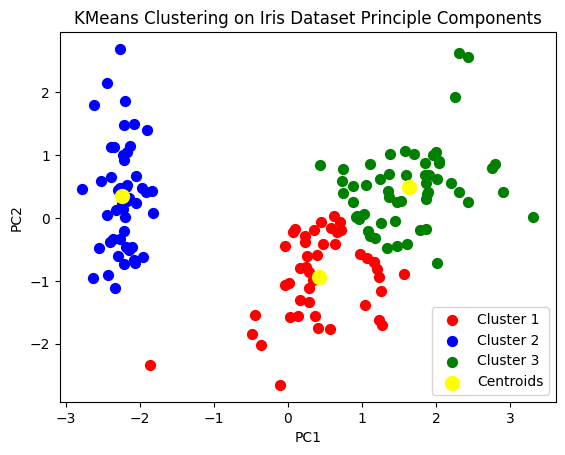

In [ ]:
# More graph generating fun for the entire family!
# (Like before, don't forget that we do have 4 PCs in here. We're only
# plotting against 2. Still, despite the predictions looking horrible,
# at least we're getting something that looks a bit nicer in the plots.)
print("\nPC1 versus PC2 (Principal Components): K-Means Clustering Illustration")
print("---------------------------------------------------------------------")
plt.scatter(data.iloc[y_kmeans == 0, 0], data.iloc[y_kmeans == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(data.iloc[y_kmeans == 1, 0], data.iloc[y_kmeans == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(data.iloc[y_kmeans == 2, 0], data.iloc[y_kmeans == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('KMeans Clustering on Iris Dataset Principle Components')
plt.show()
